In [1]:
# Standard IPython notebook imports
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.ensemble
import sklearn.tree
from encoding import squares
from utilities import *
from forests import Tree, RandomForest
from tqdm import tqdm_notebook

sns.set_style("whitegrid")

In [2]:
# 1. Mushroom dataset
# https://archive.ics.uci.edu/ml/datasets/mushroom
# only categorical attributes with missing values
columns = [
    "target",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises?",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

# Use read_csv to load the data.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushroom_df = pd.read_csv(url, header=None, names=columns)
mushroom_idx_df = mushroom_df.reset_index()
mushroom_df

,target,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


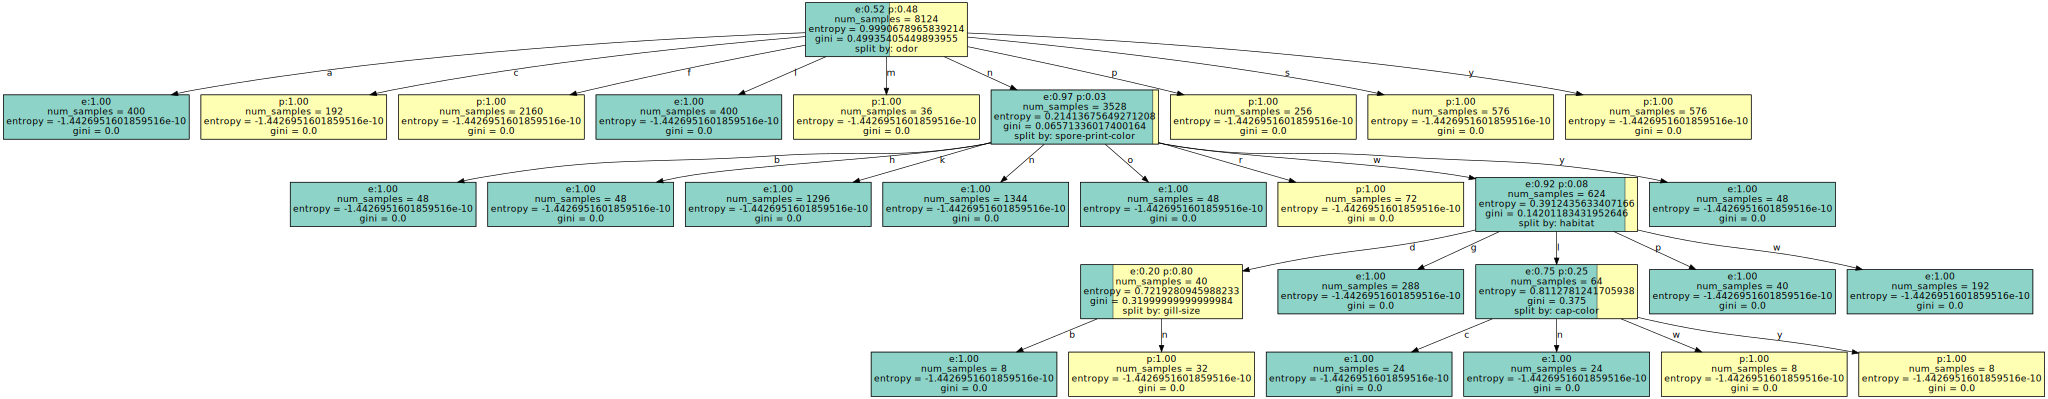

In [3]:
# Train a Decision Tree on the mushroom data.
# Plot the tree using the `.draw()` method.


mushroom_tree = Tree(mushroom_df)
mushroom_tree.draw()

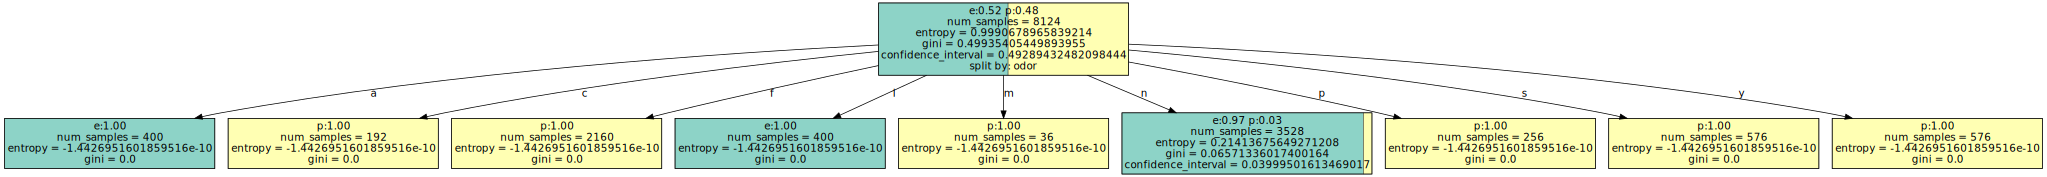

In [4]:
mushroom_tree.prune_confidence()
mushroom_tree.draw()

In [15]:
# Encode the dataset
df = pd.read_csv("datasets/rollouts.csv")

# Sample 1% of the dataset
df = df.sample(frac = 0.01)
chess_df = easy_encode(df, squares)
chess_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Winner
0,0,10,8,0,0,0,8,0,0,0,...,0,0,0,0,0,3,0,0,0,1
1,2,3,0,0,0,6,3,2,0,0,...,0,0,0,10,4,0,10,8,0,0
2,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,1
6,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,6,0,0,...,0,0,12,0,0,0,0,0,10,1
9,2,3,4,5,6,4,3,2,1,1,...,0,8,9,10,11,12,10,9,8,0


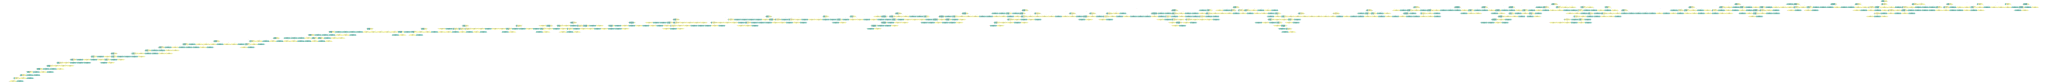

In [16]:
tree = Tree(chess_df.rename(columns={'Winner':'target'}, inplace=False))
tree.draw()

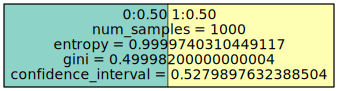

In [17]:
tree.prune_confidence()
tree.draw()

In [22]:
train_df, test_df = sklearn.model_selection.train_test_split(chess_df, test_size=0.3)
forest_easy = RandomForest(chess_df, target_column_name = 'Winner', nattrs=3, size=5)
forest_nopruning = RandomForest(train_df, target_column_name = 'Winner', nattrs=3, size=5)
forest_pruning = RandomForest(train_df, target_column_name = 'Winner', nattrs=3, size=5, pruning=True)

In [23]:
print(forest_easy.forest_error(chess_df))
print(forest_nopruning.forest_error(test_df))
print(forest_pruning.forest_error(test_df))

0.037
0.4666666666666667
0.5366666666666666
